In [1]:
# The aim of this project is to choose a county in any state and count the new death cases and perform EDA on the dataset

In [2]:
#importing all packages and dataframe so that I can read the file

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd



df1 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv') 
df1




,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
2444203,2022-04-25,Sweetwater,Wyoming,56037.0,11070,124.0
2444204,2022-04-25,Teton,Wyoming,56039.0,9975,16.0
2444205,2022-04-25,Uinta,Wyoming,56041.0,5625,39.0
2444206,2022-04-25,Washakie,Wyoming,56043.0,2356,44.0


In [3]:
#using df1.describe to print out statistical analysis on the file
df1.describe()


,fips,cases,deaths
count,2.421208e+06,2.444208e+06,2.388007e+06
mean,3.139754e+04,9.673476e+03,1.579862e+02
std,1.634169e+04,4.581740e+04,8.089830e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.902100e+04,3.650000e+02,6.000000e+00
50%,3.001100e+04,1.706000e+03,3.200000e+01
75%,4.611100e+04,5.673000e+03,9.800000e+01
max,7.803000e+04,2.864988e+06,4.017400e+04


In [4]:
#filtering out the row with Sweetwater which is the county I chose

f1=df1['county']=='Sweetwater'
f1

0          False
1          False
2          False
3          False
4          False
           ...  
2444203     True
2444204    False
2444205    False
2444206    False
2444207    False
Name: county, Length: 2444208, dtype: bool

In [5]:
# extracting the cases and deaths of  the Sweetwater county
df1[f1]

,date,county,state,fips,cases,deaths
10833,2020-03-24,Sweetwater,Wyoming,56037.0,1,0.0
12365,2020-03-25,Sweetwater,Wyoming,56037.0,1,0.0
14023,2020-03-26,Sweetwater,Wyoming,56037.0,1,0.0
15800,2020-03-27,Sweetwater,Wyoming,56037.0,1,0.0
17683,2020-03-28,Sweetwater,Wyoming,56037.0,1,0.0
...,...,...,...,...,...,...
2431178,2022-04-21,Sweetwater,Wyoming,56037.0,11070,124.0
2434434,2022-04-22,Sweetwater,Wyoming,56037.0,11070,124.0
2437690,2022-04-23,Sweetwater,Wyoming,56037.0,11070,124.0
2440946,2022-04-24,Sweetwater,Wyoming,56037.0,11070,124.0


In [6]:
#calculating 30 days of cases in Sweetwater
df1[f1].tail(30)



,date,county,state,fips,cases,deaths
2349810,2022-03-27,Sweetwater,Wyoming,56037.0,11047,124.0
2353062,2022-03-28,Sweetwater,Wyoming,56037.0,11047,124.0
2356315,2022-03-29,Sweetwater,Wyoming,56037.0,11050,124.0
2359569,2022-03-30,Sweetwater,Wyoming,56037.0,11050,124.0
2362823,2022-03-31,Sweetwater,Wyoming,56037.0,11050,124.0
2366076,2022-04-01,Sweetwater,Wyoming,56037.0,11055,124.0
2369329,2022-04-02,Sweetwater,Wyoming,56037.0,11055,124.0
2372582,2022-04-03,Sweetwater,Wyoming,56037.0,11055,124.0
2375834,2022-04-04,Sweetwater,Wyoming,56037.0,11055,124.0
2379088,2022-04-05,Sweetwater,Wyoming,56037.0,11062,124.0


In [7]:
#calculating the daily count of new cases and  deaths in Sweetwater
count_series=df1[f1].groupby(['deaths','cases']).size()
count_series

deaths  cases
0.0     1        6
        2        2
        3        3
        4        1
        5        3
                ..
124.0   11055    4
        11062    3
        11063    7
        11065    4
        11070    7
Length: 528, dtype: int64

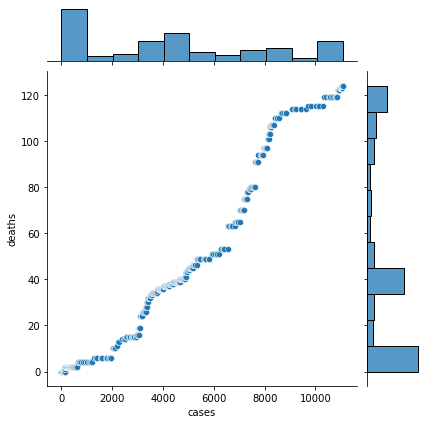

In [8]:
# exploratory data analysis 
# graph showing cases and deaths of Sweetwater
# this jointplot shows there is a relationship between cases and deaths; there are more cases than deaths that is being depicted on the graph.
sns.jointplot(x='cases',y='deaths',data=df1[f1])

In [9]:
#Creating a filter for Wyoming

f2=df1['state']=='Wyoming'
f2
            

0          False
1          False
2          False
3          False
4          False
           ...  
2444203     True
2444204     True
2444205     True
2444206     True
2444207     True
Name: state, Length: 2444208, dtype: bool

In [10]:
#filtering out each column for Wyoming
df1[f2]

,date,county,state,fips,cases,deaths
1363,2020-03-11,Sheridan,Wyoming,56033.0,1,0.0
1618,2020-03-12,Sheridan,Wyoming,56033.0,1,0.0
1932,2020-03-13,Fremont,Wyoming,56013.0,1,0.0
1933,2020-03-13,Sheridan,Wyoming,56033.0,1,0.0
2307,2020-03-14,Fremont,Wyoming,56013.0,1,0.0
...,...,...,...,...,...,...
2444203,2022-04-25,Sweetwater,Wyoming,56037.0,11070,124.0
2444204,2022-04-25,Teton,Wyoming,56039.0,9975,16.0
2444205,2022-04-25,Uinta,Wyoming,56041.0,5625,39.0
2444206,2022-04-25,Washakie,Wyoming,56043.0,2356,44.0


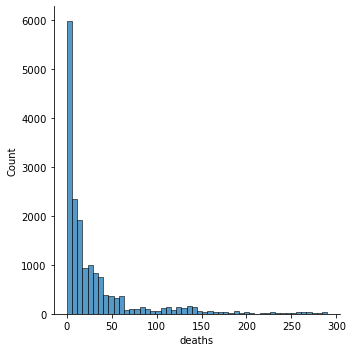

In [11]:
#Creating a graph for Wyoming's death cases which will be compared with Illiniois in the next cell
#The deaths increased in the beginning and gradually it lowered
sns.displot(df1[f2]['deaths'],bins=50)

In [12]:
#filtering out illinois
f3=df1['state']=='Illinois'
f3
       
df1[f3]

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
11,2020-01-26,Cook,Illinois,17031.0,1,0.0
16,2020-01-27,Cook,Illinois,17031.0,1,0.0
21,2020-01-28,Cook,Illinois,17031.0,1,0.0
...,...,...,...,...,...,...
2441651,2022-04-25,Whiteside,Illinois,17195.0,15451,267.0
2441652,2022-04-25,Will,Illinois,17197.0,164505,1607.0
2441653,2022-04-25,Williamson,Illinois,17199.0,22622,261.0
2441654,2022-04-25,Winnebago,Illinois,17201.0,77118,849.0


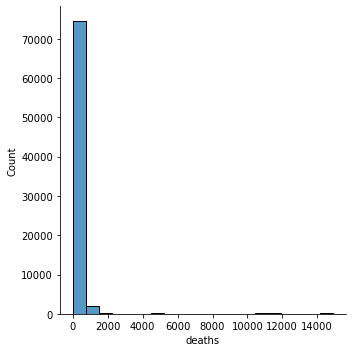

In [13]:
#creating a graph for illinois's death cases
# Illinois has a similar pattern the death rates are high in the beginning and slowly decreases
sns.displot(df1[f3]['deaths'],bins=20)

Conclusion

I chose to create two separate graphs for Illinois and Wyoming so that I can compare the total number of deaths as a result of covid19.
It appears as if Illinois has a larger number of deaths than Wyoming and both graphs are rightly skewed.